<a href="https://colab.research.google.com/github/ibnumuhammad/Dibimbing/blob/main/Ibnu_Muhammad_Hamri_Assignment_Day_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition
import sklearn.cluster as cluster 

import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
from scipy import stats
from google.colab import drive

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#Reading Data

In [77]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
cd /content/drive/MyDrive/tugas/

/content/drive/MyDrive/tugas


In [79]:
df = pd.read_csv('water_potability.csv')
print(df.head(10))

          ph    Hardness        Solids  ...  Trihalomethanes  Turbidity  Potability
0        NaN  204.890455  20791.318981  ...        86.990970   2.963135           0
1   3.716080  129.422921  18630.057858  ...        56.329076   4.500656           0
2   8.099124  224.236259  19909.541732  ...        66.420093   3.055934           0
3   8.316766  214.373394  22018.417441  ...       100.341674   4.628771           0
4   9.092223  181.101509  17978.986339  ...        31.997993   4.075075           0
5   5.584087  188.313324  28748.687739  ...        54.917862   2.559708           0
6  10.223862  248.071735  28749.716544  ...        84.603556   2.672989           0
7   8.635849  203.361523  13672.091764  ...        62.798309   4.401425           0
8        NaN  118.988579  14285.583854  ...        53.928846   3.595017           0
9  11.180284  227.231469  25484.508491  ...        71.976601   4.370562           0

[10 rows x 10 columns]


In [80]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [81]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [82]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#Exploratory Data Analysis

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [84]:
df2 = df

In [85]:
df2 = df2.dropna()

In [86]:
df2 = df2.reset_index()

In [87]:
df2.drop(['index'],axis=1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [88]:
df2.isnull().sum(axis=0)

index              0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [89]:
df[columns].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [90]:
df2[df2.isnull().any(axis=1)]

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


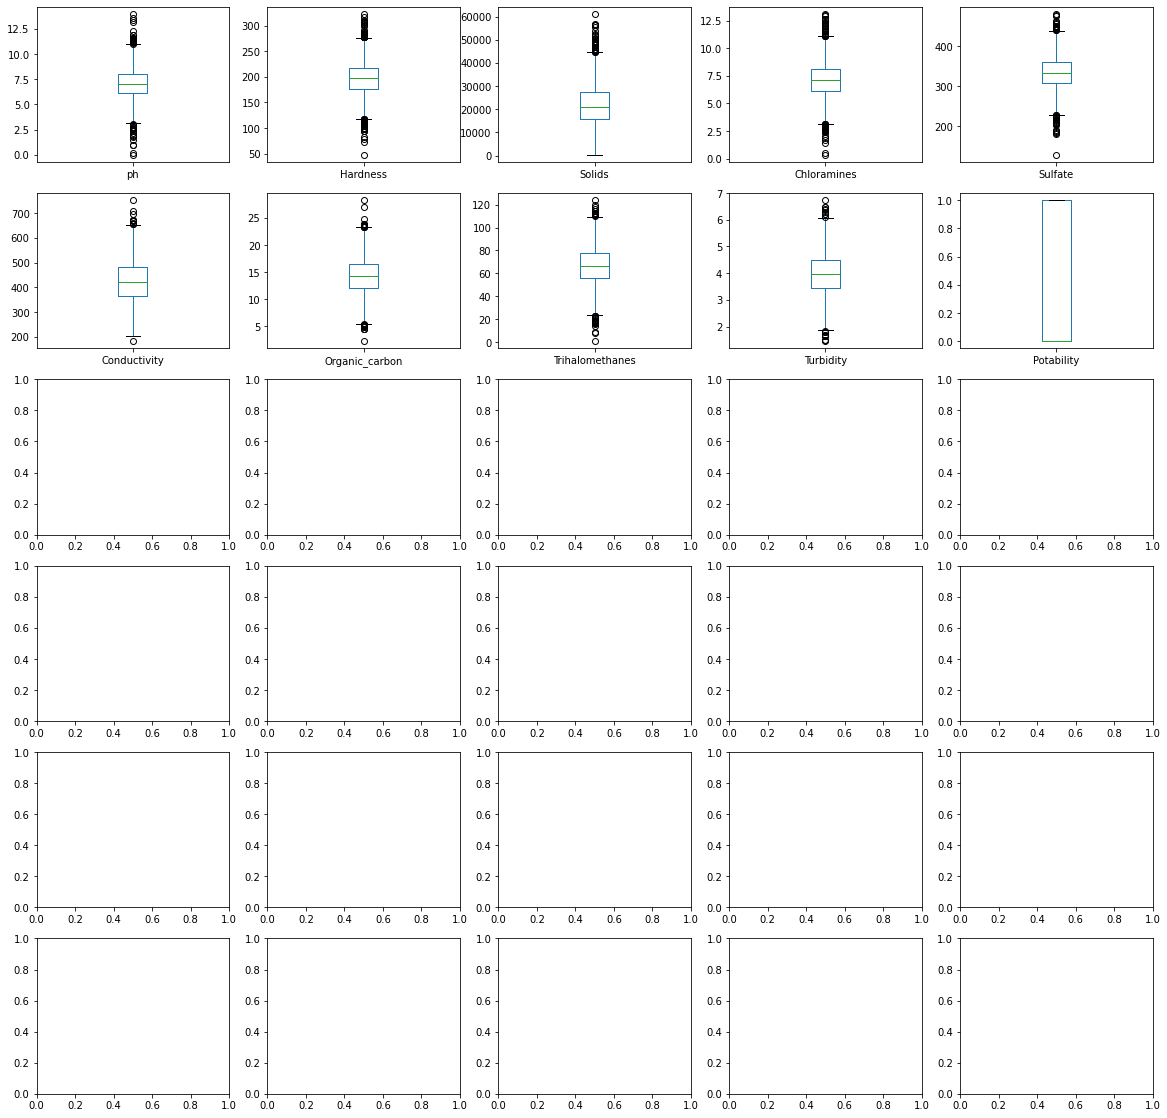

In [91]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(20,20))

for i,el in enumerate(df.columns):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)

plt.show()

In [92]:
Q1 = df[df.columns].quantile(0.25)
Q3 = df[df.columns].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 ph                     6.093092
Hardness             176.850538
Solids             15666.690297
Chloramines            6.127421
Sulfate              307.699498
Conductivity         365.734414
Organic_carbon        12.065801
Trihalomethanes       55.844536
Turbidity              3.439711
Potability             0.000000
Name: 0.25, dtype: float64

Q3:
 ph                     8.062066
Hardness             216.667456
Solids             27332.762127
Chloramines            8.114887
Sulfate              359.950170
Conductivity         481.792304
Organic_carbon        16.557652
Trihalomethanes       77.337473
Turbidity              4.500320
Potability             1.000000
Name: 0.75, dtype: float64

IQR:
 ph                     1.968974
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               52.250673
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       21.492937
Turbidity              1.060609


In [93]:
non_outlier_df = df2.copy()
for x in df.columns:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [94]:
non_outlier_df.head(5)

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [95]:
non_outlier_df.shape

(1801, 11)

In [96]:
scaler = preprocessing.StandardScaler()
final_df = non_outlier_df[df2.columns].copy()
final_df = pd.DataFrame(scaler.fit_transform(final_df[df2.columns]),columns=df2.columns)
final_df = non_outlier_df.to_numpy()

#PCA Model

In [97]:
pca_model = decomposition.PCA(n_components = 2)

In [98]:
pca_feature_array = pca_model.fit_transform(df2)

In [99]:
pca_feature_array.shape

(2011, 2)

In [100]:
pca_column = ['pca 1','pca 2']

In [101]:
pca_feature_df = pd.DataFrame(pca_feature_array,columns=pca_column)

In [102]:
pca_feature_df.head(5)

,pca 1,pca 2
0,104.344778,-1631.944030
1,-3935.035109,-1639.489933
2,6834.628335,-1615.756345
3,6835.589947,-1614.663562
4,-8241.928984,-1645.696841


In [103]:
print('explained variance:',pca_model.explained_variance_ratio_)

explained variance: [0.98798326 0.01189117]


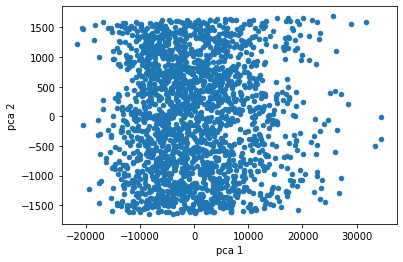

In [104]:
pca_feature_df.plot.scatter(x='pca 1',y='pca 2',colormap='viridis')

In [105]:
for x in range(1,len(df2)+1):
  pca_model_x = decomposition.PCA(n_components=x)
  pca_feature_array_x = pca_model_x.fit_transform(df2)
  print('explained variance for {} column: {}'.format(x,np.sum(pca_model_x.explained_variance_ratio_)))

explained variance for 1 column: 0.9879832643055003
explained variance for 2 column: 0.9998744331922523
explained variance for 3 column: 0.9999605176003078
explained variance for 4 column: 0.9999828366235284
explained variance for 5 column: 0.999996366421328
explained variance for 6 column: 0.9999997777907557
explained variance for 7 column: 0.9999999237357591
explained variance for 8 column: 0.9999999572779305
explained variance for 9 column: 0.9999999888568072
explained variance for 10 column: 0.9999999968777332
explained variance for 11 column: 0.9999999999999999


ValueError: ignored

#Clustering

In [106]:
cluster_model = cluster.KMeans(n_clusters=2)

In [107]:
cluster_array = cluster_model.fit(df2)

In [108]:
cluster_label = cluster_model.labels_

In [109]:
cluster_label

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [111]:
df2['cluster'] = cluster_label

In [112]:
df2.head(5)

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,cluster
0,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1
1,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,1
2,5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0
3,6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0
4,7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,1


In [113]:
for x in range(1, 30):
  cluster_model = cluster.KMeans(n_clusters=x)
  cluster_array = cluster_model.fit(df2)
  print(cluster_model.inertia_)

151950183108.17145
54887561116.49968
28870692738.190063
18627374097.548122
13149757304.760826
9895116140.821995
8019959995.676046
6653574180.482716
5555955592.243146
4926563071.209363
4456472573.045215
4095319985.226861
3762233664.8067217
3459500892.0455875
3265773089.1206884
3056503279.4233913
2884005662.994093
2730297776.4343014
2598781740.2199006
2484109683.9141407
2292034228.012142
2243755447.6605897
2089596073.8137465
1970875766.6156526
1884940612.6506627
1806784000.800681
1706828160.4914143
1654086315.27954
1601128775.228116


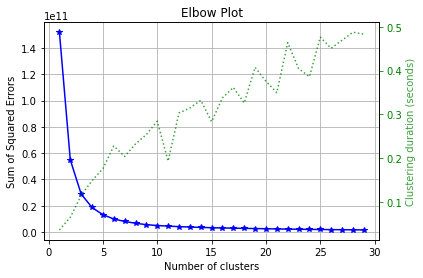

In [114]:
skplt.cluster.plot_elbow_curve(cluster_model, df2, cluster_ranges=range(1, 30))
plt.show()

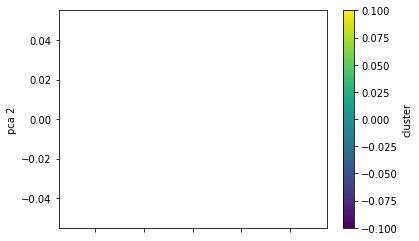

In [118]:
best_cluster_model = cluster.KMeans(n_clusters=3)
best_cluster_array = best_cluster_model.fit(df2)
best_cluster_label = best_cluster_model.labels_
pca_feature_df = pd.DataFrame(df2,columns=pca_column)
pca_feature_df['cluster'] = best_cluster_label
pca_feature_df.plot.scatter(x='pca 1',y='pca 2',c = 'cluster',colormap='viridis')